In [247]:
import numpy as np
import matplotlib.pyplot as plt

# Causal survival bags

In [208]:
def digit_response(digit):
    beta = 365 * np.exp(-0.6*digit) / np.log(1.2)
    event_times = np.random.exponential(beta)
    return event_times

def find_n_largest(unique, counts, n):
    m = sorted(counts, reverse=True)[n]
    return unique[counts.tolist().index(m)]

def true_dgm(x: np.array,
              t: int,
              y0: int):
    """
    True functional model of the data generative process
    :param x: patient features/characteristics; "IMG" whose degree of
        (differential) expression determines survival
    :param t: treatment index for the array of patient features x
    :param y0: is defined by the max digit within a bag
    :return:
    """
    if y0 == 0:
        y0=1
    
    yT = 0.5
    eta = 0.05
    
    y0 = y0*1.2
    
    if t == 0:
        y = y0 * np.exp(-x ** 2)
    elif x < 0:
        y = yT + (y0 - yT) * np.exp(-x ** 2)
    else:
        y = y0 * np.exp(-3 * x ** 2)
    return y + (2 * np.random.rand() - 1) * eta

### Form a bag

In [243]:
def generate_bag(B):
    # Given the bag of size B generate random labels for every element in B
    
    labels = np.random.randint(0, 10, size=B)
    # Count the number of times each label occurs in a bag
    unique, counts = np.unique(labels, return_counts=True)

    # generate Gene composition
    first_max_digit = find_n_largest(unique, counts, 0)
    second_max_digit = find_n_largest(unique, counts, 1)
    third_max_digit = find_n_largest(unique, counts, 2)
    
    # where it is defined as the difference between max and the sum of the 2nd and 3rd largest
    gene_expression = (first_max_digit - (second_max_digit + third_max_digit)) / 15
    return (gene_expression, first_max_digit)

In [244]:
# These define the mean size of the bag
mean_size = 50 
std_size = 10

expressions = []
# Simulate 1k of bags
for _ in range(1000):
    # Generate the size of the bag
    B = int(np.random.normal(loc=mean_size, scale=std_size, size=1))
    # Generate gene expression given the count of digits in a bag
    gene_expression, first_max_digit = generate_bag(B)
    expressions.append(gene_expression)

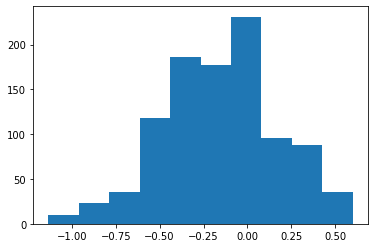

In [245]:
plt.hist(expressions);

### Survival per digit

Survival is defined by the gene expression given the count of digits in a bag; and is shifted up or down givin the digit (y0).

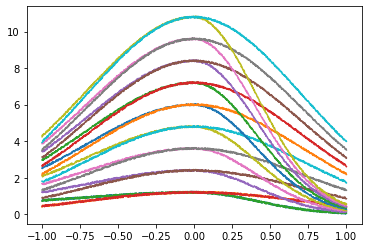

In [248]:
for digit in range(10):
#     digit = digit / 10
#     digit = np.exp(digit)
    X = np.linspace(-1, 1, 1000)
    y1 = [true_dgm(x, 1, digit) for x in X]
    y0 = [true_dgm(x, 0, digit) for x in X]
    plt.plot(x, y1); plt.plot(x, y0)